<h1>Ejercicio 3</h1>

## 1 Armar una tabla con

* todos los proyectos con nombres duplicados
* ordenados

### 1.1 Importando panda, numpy

In [2]:
import pandas
import numpy

### 1.2 Cargando datos de csv

In [3]:
file = "kickstarter-projects/ks-projects-201801.csv"
kickstarter_2018 = pandas.read_csv(file, parse_dates=["deadline","launched"], index_col=['ID'])

### 1.3 Tabla con proyectos duplicados

In [4]:
# Trayendo ids de proyectos duplicados
# keep false evita considerar los nombres en el vector ya que lo que necesitamos son los id solamente
ids_of_duplicated_projects = kickstarter_2018.name.duplicated(keep=False)

# Ordenando datos por el nombre del proyecto
kickstarter_2018[ids_of_duplicated_projects].sort_values(by='name')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.00,3000.00,3000.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.00,100.00,100000.00
422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.0,2017-04-14 00:08:52,1.0,failed,1,US,25.00,1.00,100000.00
866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.0,2015-01-27 19:30:43,7248.0,canceled,9,US,7248.00,7248.00,20000.00
1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.0,2014-07-29 13:12:21,11260.0,canceled,7,US,11260.00,11260.00,15000.00
1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.0,2016-05-07 01:56:36,0.0,canceled,0,"N,0""",NaN,0.00,5000.00


## 2 Verificar

* proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

### 2.1 Importando md5 de hashlib

In [5]:
# Necesitamos esta libreria para codificar como hash los nombres de los proyectos
from hashlib import md5

### 2.2 Creando la función "convertir_a_hash"

In [6]:
def convertir_a_hash(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

### 2.3 Creando una nueva columna hashname con el nombre en hash

In [7]:
kickstarter_2018['hashname'] = kickstarter_2018['name'].apply(convertir_a_hash)

### 2.4 Verificando que el hash name también este duplicado

In [8]:
# Trayendo ids de proyectos duplicados
# keep false evita considerar los nombres en el vector ya que lo que necesitamos son los id solamente
ids_of_duplicated_projects = kickstarter_2018.name.duplicated(keep=False)

# Ordenando datos por el nombre del proyecto
kickstarter_2018[ids_of_duplicated_projects].sort_values(by='name')[['hashname','name']].head(5)

,hashname,name
ID,,
816998285,0c7a251ffe4c7834cbc4b04906952ff1,"""...The Last shall be first..."" LODB Lifestyle..."
815783250,0c7a251ffe4c7834cbc4b04906952ff1,"""...The Last shall be first..."" LODB Lifestyle..."
1010584633,67554ab4203d95f2f2f05365f768206e,"""A Fresh Start"""
713417995,67554ab4203d95f2f2f05365f768206e,"""A Fresh Start"""
1880084695,19a82bc4c5961834282575d07d9b5f7c,"""American Sports Stories"" - An Athletic Quest"


## 3 Comparar

* la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1

### 3.1 Importando badness de ftfy

In [9]:
# Necesitamos esta libreria para establecer cuales son los valores raros
import ftfy.badness as badness

### 3.2 Creando la función es_raro 

In [10]:
def es_raro(val):
    if isinstance(val, float): 
        return 0
    return badness.sequence_weirdness(val)

### 3.3 Creando una columna 'nombres_raros' 

In [11]:
kickstarter_2018['nombres_raros'] = kickstarter_2018['name'].apply(es_raro)

### 3.4 Conteo de nombres raros

In [12]:
cantidad_de_nombres_raros = kickstarter_2018[kickstarter_2018['nombres_raros'] > 1].shape[0]
print ('Cantidad de nombres raros de kickstarter_2018 sin encoding', cantidad_de_nombres_raros)

Cantidad de nombres raros de kickstarter_2018 sin encoding 26


### 3.5 Conteo de nombres raros del dataset con encoding iso-8859-1

In [13]:
kickstarter_2018_con_encoding_iso_8859_1 = pandas.read_csv("kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')
kickstarter_2018_con_encoding_iso_8859_1['nombres_raros'] = kickstarter_2018_con_encoding_iso_8859_1['name'].apply(es_raro)

cantidad_de_nombres_raros_con_encoding_iso_8859_1 = kickstarter_2018_con_encoding_iso_8859_1[kickstarter_2018_con_encoding_iso_8859_1['nombres_raros'] > 1].shape[0]
print ('Cantidad de nombres raros en dataset con encoding iso 8859-1', cantidad_de_nombres_raros_con_encoding_iso_8859_1)




Cantidad de nombres raros en dataset con encoding iso 8859-1 7682


### 3.6 Analisis entre los dos datasets

* La cantidad de datos raros en el dataset de kickstarter sin encoding es de : 26
* La cantidad de datos raros en el dataset de kickstarted con encoding es de : 7682

## 4 Codificar

* Currency con dos estrategias

### 4.1 LabelEncoder

#### 4.1.1 Importando libreria preprocessing de sklearn

In [14]:
from sklearn import preprocessing

#### 4.1.2 Aplicando LabelEncoder sobre la columna "currency"

In [15]:
columna = 'currency'

file = "kickstarter-projects/ks-projects-201801.csv"
kickstarter_2018 = pandas.read_csv(file, parse_dates=["deadline","launched"], index_col=['ID'])

# Preparando columna currency para aplicar labelEncoder
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(kickstarter_2018[columna])

## se visualiza el mapa de encode
dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

# Aplicando Label encoder sobre el campo currency
kickstarter_2018[columna] = labelEncoder.transform(kickstarter_2018[columna]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


#### 4.1.3 Aplicando la inversa de LabelEncoder sobre la columna "currency"

In [16]:
kickstarter_2018[columna] = labelEncoder.inverse_transform(kickstarter_2018[columna]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### 4.2 LabelBinarizer

#### 4.2.1 Importando libreria LabelBinarizer de preprocessing

In [17]:
# Ahora se aplica el encoding con LabelBinarizer
from sklearn.preprocessing import LabelBinarizer


#### 4.2.2 Aplicando LabelBinarizer sobre la columna "currency"

In [18]:
columna = 'currency'
labelBinarizer = LabelBinarizer()
labelBinarizer_result = labelBinarizer.fit_transform(kickstarter_2018[columna])
pandas.DataFrame(labelBinarizer_result, columns=((columna + '_') + pandas.Series(labelBinarizer.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 5 Comparar Proyectos

### 5.1 Ver si hay proyectos exitosos

* Que no consiguieron alcanzar a recaudar el dinero objetivo

In [27]:
proyectos_exitosos_que_no_consiguieron_el_dinero_objetivo = kickstarter_2018[(kickstarter_2018.state == 'successful') & ( kickstarter_2018.pledged < kickstarter_2018.goal )]
cantidad_proyectos_exitosos_que_no_consiguieron_el_dinero_objetivo = proyectos_exitosos_que_no_consiguieron_el_dinero_objetivo.shape[0]
print(cantidad_proyectos_exitosos_que_no_consiguieron_el_dinero_objetivo)

5


### 5.2 Ver si hay proyectos exitosos

* Que consiguieron alcanzar a recaudar el dinero objetivo

In [26]:
proyectos_exitosos_que_consiguieron_el_dinero_objetivo = kickstarter_2018[(kickstarter_2018.state == 'successful') & ( kickstarter_2018.pledged >= kickstarter_2018.goal )] 
proyectos_exitosos_que_consiguieron_el_dinero_objetivo
cantidad_proyectos_exitosos_que_consiguieron_el_dinero_objetivo = proyectos_exitosos_que_consiguieron_el_dinero_objetivo.shape[0]
print(cantidad_proyectos_exitosos_que_consiguieron_el_dinero_objetivo)

133951


### 5.3 Que porcentaje

* Tienen los proyectos que si recaudaron el dinero con respecto a la totalidad de proyectos

In [29]:
porcentaje_proyectos_que_recaudaron_dinero_objetivo = (cantidad_proyectos_exitosos_que_consiguieron_el_dinero_objetivo / kickstarter_2018.shape[0]) * 100
porcentaje_proyectos_que_recaudaron_dinero_objetivo



35.37491318091908

### 5.4 Que porcentaje

* Tienen los proyectos que no recaudaron el dinero con respecto a la totalidad de proyectos

In [30]:
porcentaje_proyectos_que_no_recaudaron_dinero_objetivo = (cantidad_proyectos_exitosos_que_no_consiguieron_el_dinero_objetivo / kickstarter_2018.shape[0]) * 100
porcentaje_proyectos_que_no_recaudaron_dinero_objetivo



0.0013204422953512508

### 5.5 Calcular tabla

* Con la cantidad de proyectos por categoría principal y estado

In [32]:
kickstarter_2018.pivot_table(index='main_category',columns='state', aggfunc='count', values='name')

state,canceled,failed,live,successful,suspended,undefined
main_category,,,,,,
Art,2222.0,14130.0,194.0,11510.0,96.0,NaN
Comics,842.0,4036.0,76.0,5842.0,23.0,NaN
Crafts,843.0,5703.0,76.0,2115.0,72.0,NaN
Dance,163.0,1235.0,18.0,2338.0,13.0,1.0
Design,4152.0,14814.0,305.0,10550.0,246.0,2.0
Fashion,2650.0,14182.0,250.0,5593.0,138.0,3.0
Film & Video,5755.0,32903.0,332.0,23623.0,117.0,854.0
Food,2211.0,15969.0,184.0,6085.0,153.0,NaN
Games,6202.0,16002.0,287.0,12518.0,220.0,1.0


### 6 Calcular los valores atípicos 

* De 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

### 6.1 Importando libreria seaborn

In [35]:
# Importando libreria seaborn
import seaborn

NameError: name 'plt' is not defined

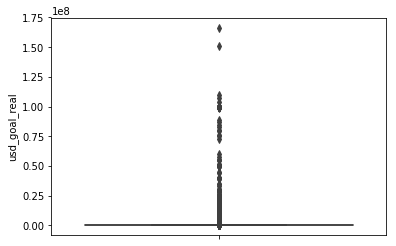

In [38]:
seaborn.boxplot(y='usd_goal_real',data=kickstarter_2018)
figure.set_size_inches((10,5))